# Morphological Analysis for Small Annotated Corpora

## 1.  A problem ... and an opportunity

In a [2017 Replication Study of LSTM-based POS taggers (Horsmann and Zesch, 2017)](https://www.ltl.uni-due.de/wp-content/uploads/horsmannZesch_emnlp2017.pdf), which builds on a well-known 2016 investigation on [arXiv](https://arxiv.org/pdf/1604.05529.pdf), it is stated that there's a soft minimum of around 60k tokens for reasonable performance in the POS tagging task.

The following chart shows the performance of various models, for a wide set of languages and language families.  Note that what is reported is 10-fold cross validation, which, depending on the experimental setup, may overestimate performance on a held out test set containing words not seen during training.

<img src="pos_accuracies.png"/>


The CLTK project develops NLP tools for dead languages.  Annotated corpora for these, when available, are sometimes relaively small.  For [Old English](http://www.oldenglishaerobics.net/resources/magic_letter.pdf) (OE, a Germanic language), for example, the [ISWOC Treebank](http://iswoc.github.io/), contains only 28,300 tokens, so half or less of the recommended minimum.  The question therefore arises of whether the performance observed for Germanic languages, in the range of 90%-96+% accuracy, can be reproduced.

Note the odd low outliter accuracy scores turned in by Icelandic.  It is relevant here because Icelandic is the modern language closest to OE, also because of its orthography: like OE, the Icelandic alphabet contains the letters ash, eth, thorn. 

That's the problem part.  The opportunity lies in the fact that the ISWOC annotations provide much more than mere POS tags.  Instead, each word is assigned values over an extensive set of morphological features.  These are listed in the XML for each annotated text:

```xml
<parts-of-speech>
      <value tag="A-" summary="adjective"/>
      <value tag="Df" summary="adverb"/>
      <value tag="S-" summary="article"/>
      <value tag="Ma" summary="cardinal numeral"/>
      <value tag="Nb" summary="common noun"/>
      <value tag="C-" summary="conjunction"/>
      <value tag="Pd" summary="demonstrative pronoun"/>
      <value tag="F-" summary="foreign word"/>
      <value tag="Px" summary="indefinite pronoun"/>
      <value tag="N-" summary="infinitive marker"/>
      <value tag="I-" summary="interjection"/>
      <value tag="Du" summary="interrogative adverb"/>
      <value tag="Pi" summary="interrogative pronoun"/>
      <value tag="Mo" summary="ordinal numeral"/>
      <value tag="Pp" summary="personal pronoun"/>
      <value tag="Pk" summary="personal reflexive pronoun"/>
      <value tag="Ps" summary="possessive pronoun"/>
      <value tag="Pt" summary="possessive reflexive pronoun"/>
      <value tag="R-" summary="preposition"/>
      <value tag="Ne" summary="proper noun"/>
      <value tag="Py" summary="quantifier"/>
      <value tag="Pc" summary="reciprocal pronoun"/>
      <value tag="Dq" summary="relative adverb"/>
      <value tag="Pr" summary="relative pronoun"/>
      <value tag="G-" summary="subjunction"/>
      <value tag="V-" summary="verb"/>
      <value tag="X-" summary="unassigned"/>
    </parts-of-speech>
    <morphology>
      <field tag="person">
        <value tag="1" summary="first person"/>
        <value tag="2" summary="second person"/>
        <value tag="3" summary="third person"/>
        <value tag="x" summary="uncertain person"/>
      </field>
      <field tag="number">
        <value tag="s" summary="singular"/>
        <value tag="d" summary="dual"/>
        <value tag="p" summary="plural"/>
        <value tag="x" summary="uncertain number"/>
      </field>
      <field tag="tense">
        <value tag="p" summary="present"/>
        <value tag="i" summary="imperfect"/>
        <value tag="r" summary="perfect"/>
        <value tag="s" summary="resultative"/>
        <value tag="a" summary="aorist"/>
        <value tag="u" summary="past"/>
        <value tag="l" summary="pluperfect"/>
        <value tag="f" summary="future"/>
        <value tag="t" summary="future perfect"/>
        <value tag="x" summary="uncertain tense"/>
      </field>
      <field tag="mood">
        <value tag="i" summary="indicative"/>
        <value tag="s" summary="subjunctive"/>
        <value tag="m" summary="imperative"/>
        <value tag="o" summary="optative"/>
        <value tag="n" summary="infinitive"/>
        <value tag="p" summary="participle"/>
        <value tag="d" summary="gerund"/>
        <value tag="g" summary="gerundive"/>
        <value tag="u" summary="supine"/>
        <value tag="x" summary="uncertain mood"/>
        <value tag="y" summary="finiteness unspecified"/>
        <value tag="e" summary="indicative or subjunctive"/>
        <value tag="f" summary="indicative or imperative"/>
        <value tag="h" summary="subjunctive or imperative"/>
        <value tag="t" summary="finite"/>
      </field>
      <field tag="voice">
        <value tag="a" summary="active"/>
        <value tag="m" summary="middle"/>
        <value tag="p" summary="passive"/>
        <value tag="e" summary="middle or passive"/>
        <value tag="x" summary="unspecified"/>
      </field>
      <field tag="gender">
        <value tag="m" summary="masculine"/>
        <value tag="f" summary="feminine"/>
        <value tag="n" summary="neuter"/>
        <value tag="p" summary="masculine or feminine"/>
        <value tag="o" summary="masculine or neuter"/>
        <value tag="r" summary="feminine or neuter"/>
        <value tag="q" summary="masculine, feminine or neuter"/>
        <value tag="x" summary="uncertain gender"/>
      </field>
      <field tag="case">
        <value tag="n" summary="nominative"/>
        <value tag="a" summary="accusative"/>
        <value tag="o" summary="oblique"/>
        <value tag="g" summary="genitive"/>
        <value tag="c" summary="genitive or dative"/>
        <value tag="e" summary="accusative or dative"/>
        <value tag="d" summary="dative"/>
        <value tag="b" summary="ablative"/>
        <value tag="i" summary="instrumental"/>
        <value tag="l" summary="locative"/>
        <value tag="v" summary="vocative"/>
        <value tag="x" summary="uncertain case"/>
        <value tag="z" summary="no case"/>
      </field>
      <field tag="degree">
        <value tag="p" summary="positive"/>
        <value tag="c" summary="comparative"/>
        <value tag="s" summary="superlative"/>
        <value tag="x" summary="uncertain degree"/>
        <value tag="z" summary="no degree"/>
      </field>
      <field tag="strength">
        <value tag="w" summary="weak"/>
        <value tag="s" summary="strong"/>
        <value tag="t" summary="weak or strong"/>
      </field>
      <field tag="inflection">
        <value tag="n" summary="non-inflecting"/>
        <value tag="i" summary="inflecting"/>
      </field>
    </morphology>
```

Two questions arise:
1.  Can we use these annotations to construct a single classifier that outputs *all* morphosyntactic features, in addition to the category feature (POS tag)?
2.  Is it just possible that the complete morphological analysis may help the individual task, e.g. POS tagging?

Let's get started.

## Baseline

### Dataset

The ISWOC treebank contains a few OE "books" that have been mostly annotated, for a total of 28,300 tokens.  The book construct provides a useful unit for splitting the dataset, because each distinct book is likely to contain idionyscratic words.  That is, by training on one set of books and testing on another, it is likely that out-of-vocabulary (OOV) tokens will occur in the test set.

We reserve one book, an Anglo-Saxon translation of Orosius' *Histories*,  as a test set (1701 tokens), while the rest form the wraining set.

### NLTK Perceptron training

Horsmann and Zesch use a conditional random fields (CRF) tagger as the baseline.  I have found that NLTK's [Perceptron tagger](http://www.nltk.org/_modules/nltk/tag/perceptron.html) to be more accurate (if somewhat slower) than the CRF tagger, so I use it here.

The following output shows, for each of the morphological features above, the performance of a separately-trained Perceptron classifer.  The following statistics are given: 10-fold CV, accuracy and Cohen's Kappa on the test set, a confusion matrix, and time to tag *Beowulf*.

Because tokens are often unvalued for some of the features (e.g. tense), raw accuracy can be misleading.  Kappa statistics are more useful in these cases.

---------- pos ----------
CV fold 1 accuracy = 0.897 kappa = 0.872 in 13.036 seconds
CV fold 2 accuracy = 0.917 kappa = 0.897 in 13.327 seconds
CV fold 3 accuracy = 0.912 kappa = 0.891 in 13.462 seconds
CV fold 4 accuracy = 0.917 kappa = 0.897 in 13.798 seconds
CV fold 5 accuracy = 0.927 kappa = 0.909 in 14.648 seconds
CV fold 6 accuracy = 0.935 kappa = 0.919 in 13.200 seconds
CV fold 7 accuracy = 0.93 kappa = 0.911 in 12.101 seconds
CV fold 8 accuracy = 0.914 kappa = 0.893 in 13.064 seconds
CV fold 9 accuracy = 0.927 kappa = 0.907 in 13.386 seconds
CV fold 10 accuracy = 0.926 kappa = 0.907 in 12.897 seconds
10-fold validation of model perceptron = 0.920
Test of model perceptron for feature pos on unseen text:
        accuracy = 0.840
        kappa = 0.809

Confusion matrix (rows = gold):
    A-   C-   DF  DU  G-   NB  NE   PD  PI   PP  PS  PX  PY   R-   V-
A-  31    0    3   0   0   22   1    0   0    0   0   0   2    0   19
C-   0  117    0   0   2    0   0    0   0    0   0   0   1    0    1
DF   3    1  115   0   2   16   3    8   0    0   0   0   2    3   10
DU   0    0    0   2   0    0   0    0   0    0   0   0   0    0    0
G-   0    2    6   0  59    1   0    7   0    0   0   0   0    1    2
NB   3    0    3   0   0  244   0    0   0    0   0   0   0    0   14
NE   0    0    2   0   0    8  86    0   0    0   0   0   0    0    0
PD   0    0   10   0   8    3   1  128   0    0   0   0   0    0    1
PI   0    2    0   0   0    0   0    0   1    0   0   0   0    0    0
PP   1    0    0   0   0    3   0    0   0  126   2   0   0    0    0
PS   0    0    1   0   0    0   0    0   0    1  27   0   0    0    0
PX   0    0    0   0   0    4   0    0   0    0   0   7   0    0    0
PY   8    1    1   0   0   22  14    1   0    0   1   0  74    0    3
R-   0    0    4   0   0    6   1    0   0    0   0   0   4  159    0
V-   3    0    1   0   0   28   0    0   0    0   0   0   2    8  230

Time for model perceptron to tag texts/oe/beowulf.txt = 2.158 secs at 9795.290 words/sec

---------- person ----------
CV fold 1 accuracy = 0.955 kappa = 0.834 in 6.394 seconds
CV fold 2 accuracy = 0.961 kappa = 0.858 in 6.156 seconds
CV fold 3 accuracy = 0.966 kappa = 0.878 in 6.376 seconds
CV fold 4 accuracy = 0.964 kappa = 0.863 in 6.294 seconds
CV fold 5 accuracy = 0.955 kappa = 0.849 in 5.946 seconds
CV fold 6 accuracy = 0.962 kappa = 0.865 in 7.360 seconds
CV fold 7 accuracy = 0.963 kappa = 0.867 in 6.452 seconds
CV fold 8 accuracy = 0.97 kappa = 0.886 in 6.639 seconds
CV fold 9 accuracy = 0.959 kappa = 0.857 in 6.775 seconds
CV fold 10 accuracy = 0.965 kappa = 0.874 in 6.102 seconds
10-fold validation of model perceptron = 0.962
Test of model perceptron for feature person on unseen text:
        accuracy = 0.956
        kappa = 0.791

Confusion matrix (rows = gold):
      -  1  2    3
-  1335  0  1   11
1     0  2  0    0
2     0  0  0    1
3    59  0  0  292

Time for model perceptron to tag texts/oe/beowulf.txt = 0.973 secs at 21723.011 words/sec

---------- number ----------
CV fold 1 accuracy = 0.917 kappa = 0.843 in 8.375 seconds
CV fold 2 accuracy = 0.909 kappa = 0.828 in 9.679 seconds
CV fold 3 accuracy = 0.907 kappa = 0.836 in 9.840 seconds
CV fold 4 accuracy = 0.911 kappa = 0.831 in 9.263 seconds
CV fold 5 accuracy = 0.916 kappa = 0.848 in 8.697 seconds
CV fold 6 accuracy = 0.912 kappa = 0.837 in 8.532 seconds
CV fold 7 accuracy = 0.912 kappa = 0.834 in 8.704 seconds
CV fold 8 accuracy = 0.913 kappa = 0.839 in 9.054 seconds
CV fold 9 accuracy = 0.919 kappa = 0.846 in 9.099 seconds
CV fold 10 accuracy = 0.909 kappa = 0.823 in 8.383 seconds
10-fold validation of model perceptron = 0.913
Test of model perceptron for feature number on unseen text:
        accuracy = 0.827
        kappa = 0.684

Confusion matrix (rows = gold):
     -    P    S   X
-  516   16   78   0
P   22  168   62   0
S   36   30  696   6
X    1   13   34  23

Time for model perceptron to tag texts/oe/beowulf.txt = 1.234 secs at 17120.223 words/sec

---------- tense ----------
CV fold 1 accuracy = 0.97 kappa = 0.826 in 5.091 seconds
CV fold 2 accuracy = 0.967 kappa = 0.824 in 5.721 seconds
CV fold 3 accuracy = 0.97 kappa = 0.831 in 4.682 seconds
CV fold 4 accuracy = 0.971 kappa = 0.829 in 4.706 seconds
CV fold 5 accuracy = 0.965 kappa = 0.803 in 5.152 seconds
CV fold 6 accuracy = 0.967 kappa = 0.814 in 5.052 seconds
CV fold 7 accuracy = 0.97 kappa = 0.832 in 4.971 seconds
CV fold 8 accuracy = 0.966 kappa = 0.813 in 4.778 seconds
CV fold 9 accuracy = 0.969 kappa = 0.830 in 4.887 seconds
CV fold 10 accuracy = 0.963 kappa = 0.795 in 4.817 seconds
10-fold validation of model perceptron = 0.968
Test of model perceptron for feature tense on unseen text:
        accuracy = 0.960
        kappa = 0.721

Confusion matrix (rows = gold):
      -   P    U
-  1441   1   15
P    16  33    2
U    36   2  155

Time for model perceptron to tag texts/oe/beowulf.txt = 0.854 secs at 24752.985 words/sec

---------- mood ----------
CV fold 1 accuracy = 0.959 kappa = 0.791 in 6.372 seconds
CV fold 2 accuracy = 0.958 kappa = 0.786 in 6.560 seconds
CV fold 3 accuracy = 0.957 kappa = 0.790 in 6.696 seconds
CV fold 4 accuracy = 0.961 kappa = 0.804 in 7.416 seconds
CV fold 5 accuracy = 0.962 kappa = 0.802 in 6.186 seconds
CV fold 6 accuracy = 0.957 kappa = 0.780 in 6.235 seconds
CV fold 7 accuracy = 0.953 kappa = 0.762 in 6.148 seconds
CV fold 8 accuracy = 0.962 kappa = 0.798 in 6.205 seconds
CV fold 9 accuracy = 0.958 kappa = 0.791 in 6.199 seconds
CV fold 10 accuracy = 0.961 kappa = 0.805 in 6.200 seconds
10-fold validation of model perceptron = 0.959
Test of model perceptron for feature mood on unseen text:
        accuracy = 0.952
        kappa = 0.699

Confusion matrix (rows = gold):
      -    I  M   N   P  S   X
-  1415    5  0   0   3  0   6
I    29  120  0   0   0  0   1
M     0    1  0   0   0  0   0
N    12    1  0  13   1  0   0
P     9    2  0   0  12  0   0
S     6    1  0   0   0  6   0
X     7    1  0   0   1  0  49

Time for model perceptron to tag texts/oe/beowulf.txt = 1.067 secs at 19806.273 words/sec

---------- gender ----------
CV fold 1 accuracy = 0.89 kappa = 0.767 in 9.088 seconds
CV fold 2 accuracy = 0.885 kappa = 0.756 in 9.011 seconds
CV fold 3 accuracy = 0.888 kappa = 0.763 in 9.081 seconds
CV fold 4 accuracy = 0.87 kappa = 0.725 in 9.156 seconds
CV fold 5 accuracy = 0.885 kappa = 0.755 in 8.893 seconds
CV fold 6 accuracy = 0.894 kappa = 0.777 in 9.337 seconds
CV fold 7 accuracy = 0.901 kappa = 0.788 in 9.568 seconds
CV fold 8 accuracy = 0.892 kappa = 0.772 in 9.374 seconds
CV fold 9 accuracy = 0.884 kappa = 0.752 in 9.298 seconds
CV fold 10 accuracy = 0.885 kappa = 0.755 in 9.722 seconds
10-fold validation of model perceptron = 0.887
Test of model perceptron for feature gender on unseen text:
        accuracy = 0.798
        kappa = 0.604

Confusion matrix (rows = gold):
     -   F    M    N  O  Q   X
-  767  17   42    7  0  0   0
F   15  74   26    6  0  0   0
M   39   7  334   35  0  0   6
N   30  12   45  138  0  0   5
O    0   0    0    2  0  0   0
Q    0   0    1    0  0  0   0
X    7   3   43    6  0  0  34

Time for model perceptron to tag texts/oe/beowulf.txt = 1.542 secs at 13705.564 words/sec

---------- case ----------
CV fold 1 accuracy = 0.888 kappa = 0.782 in 10.009 seconds
CV fold 2 accuracy = 0.882 kappa = 0.763 in 10.338 seconds
CV fold 3 accuracy = 0.883 kappa = 0.765 in 10.110 seconds
CV fold 4 accuracy = 0.892 kappa = 0.783 in 9.754 seconds
CV fold 5 accuracy = 0.874 kappa = 0.753 in 9.861 seconds
CV fold 6 accuracy = 0.882 kappa = 0.764 in 10.964 seconds
CV fold 7 accuracy = 0.878 kappa = 0.754 in 10.595 seconds
CV fold 8 accuracy = 0.889 kappa = 0.779 in 12.556 seconds
CV fold 9 accuracy = 0.881 kappa = 0.764 in 10.202 seconds
CV fold 10 accuracy = 0.874 kappa = 0.752 in 9.930 seconds
10-fold validation of model perceptron = 0.882
Test of model perceptron for feature case on unseen text:
        accuracy = 0.814
        kappa = 0.635

Confusion matrix (rows = gold):
     -    A    D   G  I    N   X
-  775   13   19   4  0   19   2
A   25  122    1   2  2   37   3
D    7    4  193   0  0    3   4
G    8    5    3  60  0    9   0
I    1    0    1   1  2    1   0
N   40   37    5   2  0  192   7
X   13   13    8  10  0   16  32

Time for model perceptron to tag texts/oe/beowulf.txt = 1.408 secs at 15012.101 words/sec

---------- degree ----------
CV fold 1 accuracy = 0.969 kappa = 0.611 in 2.920 seconds
CV fold 2 accuracy = 0.962 kappa = 0.578 in 2.767 seconds
CV fold 3 accuracy = 0.959 kappa = 0.545 in 2.562 seconds
CV fold 4 accuracy = 0.964 kappa = 0.577 in 2.597 seconds
CV fold 5 accuracy = 0.964 kappa = 0.619 in 2.525 seconds
CV fold 6 accuracy = 0.962 kappa = 0.543 in 2.515 seconds
CV fold 7 accuracy = 0.961 kappa = 0.569 in 2.541 seconds
CV fold 8 accuracy = 0.976 kappa = 0.689 in 2.641 seconds
CV fold 9 accuracy = 0.957 kappa = 0.519 in 2.411 seconds
CV fold 10 accuracy = 0.96 kappa = 0.558 in 2.509 seconds
10-fold validation of model perceptron = 0.964
Test of model perceptron for feature degree on unseen text:
        accuracy = 0.907
        kappa = 0.383

Confusion matrix (rows = gold):
      -  C   P  S  X   Z
-  1436  0   4  1  0   4
C     7  4   0  0  0   0
P    72  0  64  0  0   3
S     7  0   2  6  0   0
X    18  0   0  0  0   8
Z    28  0   5  0  0  32

Time for model perceptron to tag texts/oe/beowulf.txt = 0.408 secs at 51824.308 words/sec

---------- strength ----------
CV fold 1 accuracy = 0.966 kappa = 0.629 in 2.157 seconds
CV fold 2 accuracy = 0.966 kappa = 0.639 in 2.215 seconds
CV fold 3 accuracy = 0.969 kappa = 0.690 in 2.150 seconds
CV fold 4 accuracy = 0.965 kappa = 0.646 in 2.244 seconds
CV fold 5 accuracy = 0.97 kappa = 0.673 in 2.120 seconds
CV fold 6 accuracy = 0.966 kappa = 0.621 in 2.218 seconds
CV fold 7 accuracy = 0.961 kappa = 0.609 in 2.145 seconds
CV fold 8 accuracy = 0.968 kappa = 0.663 in 2.177 seconds
CV fold 9 accuracy = 0.971 kappa = 0.680 in 2.199 seconds
CV fold 10 accuracy = 0.96 kappa = 0.597 in 2.161 seconds
10-fold validation of model perceptron = 0.966
Test of model perceptron for feature strength on unseen text:
        accuracy = 0.927
        kappa = 0.439

Confusion matrix (rows = gold):
      -   S   T  W
-  1467  11   0  0
S    47  77   4  1
T    44   7  25  0
W    13   0   0  5

Time for model perceptron to tag texts/oe/beowulf.txt = 0.372 secs at 56854.136 words/sec

---------- inflection ----------
CV fold 1 accuracy = 0.955 kappa = 0.863 in 2.307 seconds
CV fold 2 accuracy = 0.961 kappa = 0.876 in 2.115 seconds
CV fold 3 accuracy = 0.957 kappa = 0.860 in 2.174 seconds
CV fold 4 accuracy = 0.958 kappa = 0.870 in 2.115 seconds
CV fold 5 accuracy = 0.961 kappa = 0.879 in 2.118 seconds
CV fold 6 accuracy = 0.956 kappa = 0.866 in 2.192 seconds
CV fold 7 accuracy = 0.965 kappa = 0.889 in 2.176 seconds
CV fold 8 accuracy = 0.962 kappa = 0.879 in 2.174 seconds
CV fold 9 accuracy = 0.968 kappa = 0.900 in 2.292 seconds
CV fold 10 accuracy = 0.967 kappa = 0.895 in 2.251 seconds
10-fold validation of model perceptron = 0.961
Test of model perceptron for feature inflection on unseen text:
        accuracy = 0.931
        kappa = 0.788

Confusion matrix (rows = gold):
      I    N
I  1115   33
N    87  466

Time for model perceptron to tag texts/oe/beowulf.txt = 0.357 secs at 59155.522 words/sec
```

The 10-fold CV accuracy for POS tagging is 92%, placing the tagger in the general range of the Germanic LSTM-based approaches considered by Horsmann and Zesch. 

Test accuracy for POS tagging is considerably lower, at 84%, likely because of OOV terms.  The question then is whether this score can be improved upon. End users are likely to require at least 90% accuracy -- likely a lot more!

## The boring bits ...
### Character-level representation

One of the inputs into the model described below consists of words in sentences represented as indices into an alphabet of letters.

Script files for downloading and preprocessing the ISWOC treebank are available as part of the [old_english_models_cltk](https://github.com/cltk/old_english_models_cltk) repository.

Let's load the sentences in the full set, along with their tags:

In [1]:
import numpy as np

def load_corpus(filename, tagged=True):
    with open(filename, "r") as f:
        sentences = []
        words = {}
        for line in f:
            sentence = []
            pairs = line.rstrip('\n').split(' ')
            for pair in pairs:
                if pair != '':
                    if tagged == True:
                        word, tag = pair.split('/')
                        sentence.append((word, tag))
                        words[(word, tag)] = words.get((word, tag), 0) + 1                    
                    else:
                        sentence.append(pair)
                        words[pair] = words.get(pair, 0) + 1
            sentences.append(sentence)


        return words, sentences

In [2]:
words, sents = load_corpus('../corpora/oe/oe.all_features')

Sentences are just lists of (token, taglist) pairs, where a taglist is the concatenation of all morphosyntactic features for the word.

In [3]:
sents[:2]

[[('Mæg', 'V-3spi-----i'),
  ('gehyran', 'V----n-----n'),
  ('se', 'Pd-s---mn--i'),
  ('ðe', 'G----------n'),
  ('wyle', 'V-3spx-----i'),
  ('be', 'R----------n'),
  ('þam', 'Pd-s---nd--i'),
  ('halgan', 'A--s---ndpwi'),
  ('mædene', 'Nb-s---nd--i'),
  ('Eugenian', 'Ne-s---fd--i'),
  ('Philyppus', 'Ne-s---mg--i'),
  ('dæhter', 'Nb-s---fd--i'),
  ('hu', 'Du---------n'),
  ('heo', 'Pp3s---fn--i'),
  ('ðurh', 'R----------n'),
  ('mægðhad', 'Nb-s---ma--i'),
  ('mærlice', 'Df-------p-i'),
  ('þeah', 'V-3sui-----i'),
  ('and', 'C----------n'),
  ('þurh', 'R----------n'),
  ('martyrdom', 'Nb-s---ma--i'),
  ('þisne', 'Pd-s---ma--i'),
  ('middaneard', 'Nb-s---ma--i'),
  ('oferswað', 'V-xxui-----i')],
 [('Sum', 'Py-s---mnpsi'),
  ('æþelboren', 'A--s---mnpsi'),
  ('þægn', 'Nb-s---mn--i'),
  ('wæs', 'V-3sui-----i'),
  ('Philippus', 'Ne-s---mn--i'),
  ('gehaten', 'V--xup-xx-ti'),
  ('ðone', 'Pd-s---ma--i'),
  ('asende', 'V-3spx-----i'),
  ('se', 'Pd-s---mn--i'),
  ('casere', 'Nb-s---mn--i'),
  ('Co

First we need the complete alphabet for the orthography.  In passing we'll get the maximum word length in the corpus.

In [4]:
def build_alphabet(words):
    alphabet = {}
    max_word_len = 0
    
    for word in words:
        max_word_len = max(len(word), max_word_len)
        for letter in word:
            alphabet[letter] = alphabet.get(letter, 0) + 1
            
    return list(alphabet.keys()), max_word_len

In [5]:
alpha, max_word_len = build_alphabet([word for word,_ in words.keys()])
print(max_word_len)
max_word_len = 12

18

We will use a shorter word length to avoid too many zeros in the representations.

Similarly, looking at the lengths of sentences ...

In [7]:
max_word_len = 12
max_sent_len = 48

{1: 12, 2: 52, 3: 109, 4: 224, 5: 204, 6: 217, 7: 199, 8: 186, 9: 168, 10: 128, 11: 116, 12: 112, 13: 95, 14: 78, 15: 95, 16: 76, 17: 50, 18: 54, 19: 52, 20: 33, 21: 35, 22: 21, 23: 19, 24: 25, 25: 22, 26: 19, 27: 17, 28: 21, 29: 13, 30: 12, 31: 5, 32: 11, 33: 2, 34: 5, 35: 5, 36: 5, 37: 1, 38: 2, 39: 4, 40: 6, 41: 2, 42: 2, 44: 2, 45: 3, 46: 1, 47: 3, 48: 4, 50: 3, 51: 1, 53: 3, 54: 1, 57: 1}


... it looks as if we won't lose too much annotated data if we cut off the sentences at a maximum of 48 words.

Now we convert the textual representation of tokens into vectors of indices into the alphabet, and break up the feature string into distinct sets of one-shot vectors representing the output.

In [8]:
from keras.utils.np_utils import to_categorical

feature_names = ['pos', 'person', 'number', 'tense', 'mood', 'voice', 'gender', 'case', 'degree', 'strength', 'inflection']

def indexify(string_list):
    vocab = list(set(string_list))
    return np.asarray([vocab.index(elem)+1 for elem in string_list]), vocab

def convert_morphology(tagged_words):
    slicers = [(0,2),2,3,4,5,6,7,8,9,10,11]
    feature_tags = [[] for _ in slicers]
    
    for _, tag in tagged_words:
        for i, slicer in enumerate(slicers):
            start, end = slicer if type(slicer) == tuple else (slicer, slicer + 1)
            feature_tags[i].append(tag[start:end])
        
    vectors = []
    label_sets = []
    indices = []
    for feature in feature_tags:
        idx, labels = indexify(feature)
        label_sets.append(labels)
        indices.append(idx)
        vectors.append(to_categorical(idx))
        
    return vectors, label_sets, indices

Using TensorFlow backend.


In [9]:
def select_letter_indices(word, alphabet, max_word_len):
    v = np.zeros((max_word_len))
    
    for i in range(min(len(word), max_word_len)):
        v[i] = alphabet.index(word[i]) + 1 if word[i] in alphabet else 0
        
    return v
    
def create_char_dataset(tagged_words, sentences, alphabet, max_sent_len, max_word_len):
    num_sentences = len(sentences)
    X = np.zeros((num_sentences, max_sent_len, max_word_len), dtype='int32')
    
    tagged_tokens = []
    for i, sent in enumerate(sentences):
        sent_len = len(sent)
        for j, (word, tag) in enumerate(sent):
            if j >= max_sent_len:
                break
            tagged_tokens.append((word, tag))
            X[i, j, :] = select_letter_indices(word, alphabet, max_word_len)
        
    features, labels, _ = convert_morphology(tagged_tokens)
    
    Y = [np.zeros((num_sentences, max_sent_len, F.shape[1])) for F in features]
    i = 0
    for j, sent in enumerate(sentences):
        for k in range(min(max_sent_len, len(sent))):
            for f in range(len(features)):
                Y[f][j, k, :] = features[f][i]
            i += 1

    return X, Y, labels, tagged_tokens

In [10]:
X, Y, labels, _ = create_char_dataset(words, sents, alpha, max_sent_len, max_word_len)

In [11]:
labels

[['Pd',
  'Pp',
  'A-',
  'N-',
  'C-',
  'F-',
  'Du',
  'Df',
  'Nb',
  'Px',
  'V-',
  'Pi',
  'Ps',
  'R-',
  'Ne',
  'G-',
  'I-',
  'Py'],
 ['3', 'x', '1', '-', '2'],
 ['x', 's', 'p', '-', 'd'],
 ['u', 'p', '-'],
 ['n', 'm', 's', 'p', '-', 'i', 'x'],
 ['-'],
 ['q', 'r', 'f', 'n', 'm', 'o', 'p', '-', 'x'],
 ['a', 'n', 'o', '-', 'i', 'g', 'd', 'x', 'z'],
 ['c', 's', 'p', '-', 'x', 'z'],
 ['w', 't', 's', '-'],
 ['n', 'i']]

The input is a 3D tensor of dimensions (sentences, words, letters), and the output a list of 3D tensors of dimensions (sentences, words, one-shot-vector), one per feature (POS, case, etc.)

In [12]:
X.shape, Y[0].shape

((2536, 48, 12), (2536, 48, 19))

Now we split the datasets into training and test sets.  The last 110 sentences of the corpus correspond to the Orosius text.

In [13]:
X_test, Y_test = X[-110:], [y[-110:] for y in Y]
X = X[:-110]
Y = [y[:-110] for y in Y]

### Semantic vectors for words

The second input consists of word2vec vectors representing the semantics of whole words.  The vectors were previously computed using the well-known skipgram + negative sampling method.

Let's load the vocabulary and create forward and reverse indices.

In [14]:
def load_vocab(filename):
    vocab = {}
    rev_vocab = {}
    
    with open(filename, 'r') as f:
        for pair in f:
            idx, word = pair.split()
            vocab[word] = int(idx)
            rev_vocab[int(idx)] = word
            
    return vocab, rev_vocab

In [15]:
vocab, rev_vocab = load_vocab('../models/oe/oe_types.txt')

The vectors were computed using OE text found online.  All of the ISWOC corpus texts are included in this larger corpus, so there will be zero OOV terms during training and evaluation.

In [16]:
len(vocab)

325198

Next, we load and normalize the vectors themselves.  The zeroeth vector contains zeros, for empty word slots in sentences, and thus supporing Keras masking.

In [22]:
import pickle

def load_vectors(filename):
    with open(filename, 'rb') as f:
        vectors = pickle.load(f)
        
    vectors = np.concatenate([np.zeros((1,300)),vectors],axis=0)
    norm_vectors = np.divide(vectors, np.linalg.norm(vectors, axis=-1, keepdims=True))
    norm_vectors[0] = 0
    
    return norm_vectors

In [23]:
vectors = load_vectors('../models/oe/oe_vectors.bin')

/home/jds/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Finally, we indexify the text into the vocabulary, thus linking the input sentences to entries in the vector table.  The latter will get loaded into a Keras embedding matrix.

In [19]:
def create_word_dataset(sentences, vocab, max_sent_len):
    X = np.zeros((len(sentences), max_sent_len))
    for i, sent in enumerate(sentences):
        for j, (word, _) in enumerate(sent):
            if j == max_sent_len:
                break
            X[i,j] = vocab[word]
            
    return X

In [20]:
X2 = create_word_dataset(sents, vocab, max_sent_len)
X2_train = X2[:-110]
X2_test = X2[-110:]

## The Model

Now we can look at the model.  It is worth noting that the model presented here is the result of a long search over possible approaches, including various mixes of convolutional and recurrent networks, including encoder-decoder setups, inception convents with attention, character-only, word-only, and more.  

Which is hardly to say this is the *best* approach; just the one that so far has worked best for the specific problem of morphological analysis of OE using the ISWOC data set.

### The basic idea

1.  We have two embedding matrices: one, entirely trained from random initialization, representing characters; the other representing semantic word vectors.  The latter is not trained.
2.  The character vectors are each fed to a character Bi-LSTM, to yield a vector per word.
3.  These character-based word vectors are concatenated to word2vec vectors for each word in the sentence.
4.  The concatenated vectors from (3) are fed to a second Bi-LSTM, that again yields a vector per word.
5.  The BiLSTM sequence output is passed through three fully-connected feedforward layers.
6.  A sepearate softmax layer, one per feature, is then run over the result of step 5.

This model is roughly comparable to the Word+Char model tested by Horsmann and Zesch.

Note 1: One *could* use convolutions for processing the character-level information.  The trouble is that Keras convolutional networks do not support masking, while RNNs do.  Hence that use of RNNs throughout.

Note 2: LSTMs tend to overfit easily, hence the aggressive use of regularization in the LSTM layers.


<img src="model.png"/>

In [21]:
from keras import layers, Input
from keras.models import Model
from keras import regularizers
import keras.backend as K

def make_char_word_rnn_model(
    word_vectors,
    alphabet_size, 
    char_vector_width, 
    max_sent_len,
    max_word_len, 
    char_lstm_size,
    word_lstm_size,
    morpho_sizes,
    morpho_names,
    dense_size):
    
    
    # The Char portion
    # sub-word features
    char_embed = layers.Embedding(alphabet_size + 1,
                             char_vector_width,
                             input_length = max_word_len,
                             trainable = True,
                             mask_zero = True)  
    
    # encode the input
    char_input = Input(shape=(max_sent_len, max_word_len, ), dtype='float32')
    vectors = layers.TimeDistributed(char_embed)(char_input)
    
    # run word-level RNNs over the letters
    word_rnn = layers.Bidirectional(layers.GRU(char_lstm_size, activation='tanh', 
                                                dropout=0.2, recurrent_dropout=0.2))
    char_vectors = layers.TimeDistributed(word_rnn)(vectors)
   
    # The Word portion
    # word vectors
    word_embed = layers.Embedding(word_vectors.shape[0],
                                  word_vectors.shape[1],
                                  input_length=max_sent_len,
                                  weights=[word_vectors],
                                  trainable = False,
                                  mask_zero = True)
    
    word_input = Input(shape=(max_sent_len,), dtype='float32')
    word_vectors = word_embed(word_input)
    
    char_word_vectors = layers.concatenate([char_vectors, word_vectors], axis=-1)
    
    word_lstm = layers.Bidirectional(layers.LSTM(word_lstm_size, return_sequences=True, 
                                                 name='word_encoder',
                                                 activation='tanh',
                                                 kernel_regularizer=regularizers.l2(0.01),
                                                 activity_regularizer=regularizers.l2(0.01),
                                                 dropout=0.4, recurrent_dropout=0.4))(char_word_vectors)
    
    
    # push through dense layers
    out = layers.Dense(dense_size, activation='relu')(word_lstm)
    out = layers.Dropout(rate=0.2)(out)
    out = layers.Dense(dense_size, activation='relu')(out)
    out = layers.Dropout(rate=0.2)(out)
    out = layers.Dense(dense_size, activation='relu')(out)
    out = layers.Dropout(rate=0.2)(out)
    
    # generate the output via softmax layers
    outputs = [layers.Dense(morpho_size, activation='softmax', name=morpho_names[i])(out) 
               for i, morpho_size in enumerate(morpho_sizes)]

    model = Model([char_input, word_input], outputs)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    
    
    return model

In [25]:
m1 = make_char_word_rnn_model(vectors, len(alpha), 
                              60, max_sent_len, max_word_len,
                              100, 100,
                              [y.shape[2] for y in Y],
                              feature_names,
                              200)
m1.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 48, 12)       0                                            
__________________________________________________________________________________________________
time_distributed_3 (TimeDistrib (None, 48, 12, 60)   3540        input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 48)           0                                            
__________________________________________________________________________________________________
time_distributed_4 (TimeDistrib (None, 48, 200)      96600       time_distributed_3[0][0]         
__________________________________________________________________________________________________
embedding_

A callback will help visualize the training process.  Three plots will be produced:

1.  Training and validation losses.
2.  Training accuracy for each feature type.
3.  Validation accuracy for each feature type. 

In [23]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
import keras


class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.accs = {}
        self.val_accs = {}
        for f in feature_names:
            self.accs[f] = []
            self.val_accs[f] = []
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
        for f in feature_names:
            self.accs[f].append(logs.get(f + '_acc'))
            self.val_accs[f].append(logs.get('val_' + f + '_acc'))
        self.i += 1
        
        clear_output(wait=True)
        _, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(20, 10))
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        
        for f in feature_names:
            ax2.plot(self.x, self.accs[f], label=(f + "_acc"))
            ax3.plot(self.x, self.val_accs[f], label="val_" + f + "_acc")
            
        ax1.legend()
        ax2.legend()
        ax3.legend()
        plt.show();
        
        for f in feature_names:
            print(f +  " best:", np.round(np.max(self.val_accs[f]), 3), "last:", np.round(self.val_accs[f][-1], 3))
        
plot_losses = PlotLosses()

Now we are ready to train the model.  A smaller batch-size seems to work earlier on, though in a careful training regime it emerges that increasing the batch size later yields slightly higher test accuracy.

We will split the training dataset again 95/05 so that a validation ("dev") set will provide information about the fitting process.


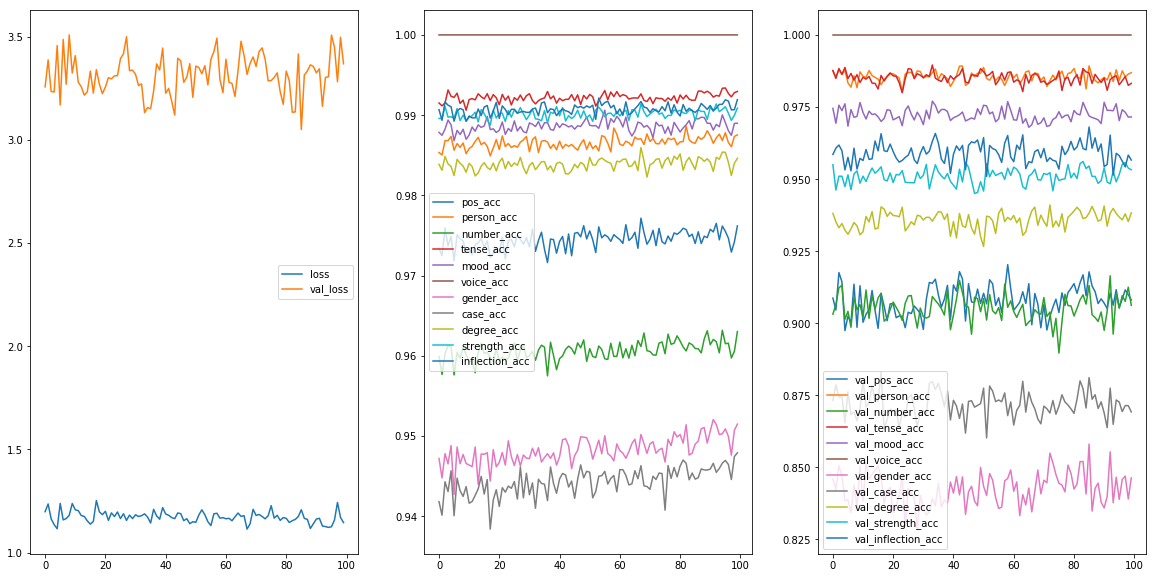

pos best: 0.92 last: 0.908
person best: 0.989 last: 0.987
number best: 0.916 last: 0.906
tense best: 0.99 last: 0.983
mood best: 0.977 last: 0.972
voice best: 1.0 last: 1.0
gender best: 0.858 last: 0.846
case best: 0.883 last: 0.869
degree best: 0.941 last: 0.938
strength best: 0.956 last: 0.953
inflection best: 0.968 last: 0.957


In [40]:
idx = list(range(len(X)))
np.random.shuffle(idx)
history = m1.fit([X[idx], X2_train[idx]], [y[idx] for y in Y],
                 batch_size=16, epochs=100,
                 callbacks=[plot_losses],
                 validation_data=([X_test, X2_test], [y for y in Y_test]))

## Results

Let's evaluate the model against the test set, the same that was used in evaluating the Perceptron tagger above.

In [41]:
dict(zip(feature_names, np.round(m1.evaluate([X_test, X2_test], [y for y in  Y_test], batch_size=256)[-11:], 3)))

110/110 [==============================] - 1s 8ms/step


{'case': 0.87,
 'degree': 0.941,
 'gender': 0.852,
 'inflection': 0.958,
 'mood': 0.972,
 'number': 0.907,
 'person': 0.986,
 'pos': 0.914,
 'strength': 0.955,
 'tense': 0.983,
 'voice': 1.0}

Comparing this result to the Perceptron tagger above, we see that the Word+Char model improves on NLTK's AveragedPerceptron across all features, and especially so for the POS tagging task.  

The POS accuracy of 0.918 puts the Word+Char in the range of the Germanic taggers tested by Horsmann and Zesch, though somewhat on the lower end.

| Feature | Perceptron Tagger | Word+Char LSTM | Diff |
----------|-------------------|----------------|------|
|  POS | 0.840 | 0.914 | + 7.4% |
| Person | 0.956 | 0.979 | + 2.3% |
| Number | 0.827 | 0.91 | + 9.3% |
| Tense | 0.960 | 0.979 | + 3.9% |
| Mood | 0.952 | 0.967 | + 1.5% |
| Gender | 0.798 | 0.858 | + 6.0% |
| Case | 0.814 | 0.874 | + 6.0 % |
| Degree | 0.907 | 0.935 | + 2.8% |
| Strength | 0.927 | 0.954 | + 2.7% |
| Inflection | 0.931 | 0.965 | + 3.4% |

### Error Analysis

In [42]:
import xml.etree.ElementTree as ET

def extract_labels(labelsXML):
    root = ET.fromstring(labelsXML)

    labels = {}

    for parts_of_speech in root.iter('parts-of-speech'):
        labels['pos'] = {}

        for value in parts_of_speech.iter('value'):
            tag = value.attrib['tag']
            label = value.attrib['summary']
            labels['pos'][tag] = label

    for field in root.iter('field'):
        feature = field.attrib['tag']
        labels[feature] = {}
        labels[feature]['-'] = 'none'

        for value in field.iter('value'):
            tag = value.attrib['tag']
            label = value.attrib['summary']
            labels[feature][tag] = label
            
    return labels

In [43]:
labelsXML = '''
<tags>
<parts-of-speech>
      <value tag="A-" summary="adjective"/>
      <value tag="Df" summary="adverb"/>
      <value tag="S-" summary="article"/>
      <value tag="Ma" summary="cardinal numeral"/>
      <value tag="Nb" summary="common noun"/>
      <value tag="C-" summary="conjunction"/>
      <value tag="Pd" summary="demonstrative pronoun"/>
      <value tag="F-" summary="foreign word"/>
      <value tag="Px" summary="indefinite pronoun"/>
      <value tag="N-" summary="infinitive marker"/>
      <value tag="I-" summary="interjection"/>
      <value tag="Du" summary="interrogative adverb"/>
      <value tag="Pi" summary="interrogative pronoun"/>
      <value tag="Mo" summary="ordinal numeral"/>
      <value tag="Pp" summary="personal pronoun"/>
      <value tag="Pk" summary="personal reflexive pronoun"/>
      <value tag="Ps" summary="possessive pronoun"/>
      <value tag="Pt" summary="possessive reflexive pronoun"/>
      <value tag="R-" summary="preposition"/>
      <value tag="Ne" summary="proper noun"/>
      <value tag="Py" summary="quantifier"/>
      <value tag="Pc" summary="reciprocal pronoun"/>
      <value tag="Dq" summary="relative adverb"/>
      <value tag="Pr" summary="relative pronoun"/>
      <value tag="G-" summary="subjunction"/>
      <value tag="V-" summary="verb"/>
      <value tag="X-" summary="unassigned"/>
    </parts-of-speech>
    <morphology>
      <field tag="person">
        <value tag="1" summary="first person"/>
        <value tag="2" summary="second person"/>
        <value tag="3" summary="third person"/>
        <value tag="x" summary="uncertain person"/>
      </field>
      <field tag="number">
        <value tag="s" summary="singular"/>
        <value tag="d" summary="dual"/>
        <value tag="p" summary="plural"/>
        <value tag="x" summary="uncertain number"/>
      </field>
      <field tag="tense">
        <value tag="p" summary="present"/>
        <value tag="i" summary="imperfect"/>
        <value tag="r" summary="perfect"/>
        <value tag="s" summary="resultative"/>
        <value tag="a" summary="aorist"/>
        <value tag="u" summary="past"/>
        <value tag="l" summary="pluperfect"/>
        <value tag="f" summary="future"/>
        <value tag="t" summary="future perfect"/>
        <value tag="x" summary="uncertain tense"/>
      </field>
      <field tag="mood">
        <value tag="i" summary="indicative"/>
        <value tag="s" summary="subjunctive"/>
        <value tag="m" summary="imperative"/>
        <value tag="o" summary="optative"/>
        <value tag="n" summary="infinitive"/>
        <value tag="p" summary="participle"/>
        <value tag="d" summary="gerund"/>
        <value tag="g" summary="gerundive"/>
        <value tag="u" summary="supine"/>
        <value tag="x" summary="uncertain mood"/>
        <value tag="y" summary="finiteness unspecified"/>
        <value tag="e" summary="indicative or subjunctive"/>
        <value tag="f" summary="indicative or imperative"/>
        <value tag="h" summary="subjunctive or imperative"/>
        <value tag="t" summary="finite"/>
      </field>
      <field tag="voice">
        <value tag="a" summary="active"/>
        <value tag="m" summary="middle"/>
        <value tag="p" summary="passive"/>
        <value tag="e" summary="middle or passive"/>
        <value tag="x" summary="unspecified"/>
      </field>
      <field tag="gender">
        <value tag="m" summary="masculine"/>
        <value tag="f" summary="feminine"/>
        <value tag="n" summary="neuter"/>
        <value tag="p" summary="masculine or feminine"/>
        <value tag="o" summary="masculine or neuter"/>
        <value tag="r" summary="feminine or neuter"/>
        <value tag="q" summary="masculine, feminine or neuter"/>
        <value tag="x" summary="uncertain gender"/>
      </field>
      <field tag="case">
        <value tag="n" summary="nominative"/>
        <value tag="a" summary="accusative"/>
        <value tag="o" summary="oblique"/>
        <value tag="g" summary="genitive"/>
        <value tag="c" summary="genitive or dative"/>
        <value tag="e" summary="accusative or dative"/>
        <value tag="d" summary="dative"/>
        <value tag="b" summary="ablative"/>
        <value tag="i" summary="instrumental"/>
        <value tag="l" summary="locative"/>
        <value tag="v" summary="vocative"/>
        <value tag="x" summary="uncertain case"/>
        <value tag="z" summary="no case"/>
      </field>
      <field tag="degree">
        <value tag="p" summary="positive"/>
        <value tag="c" summary="comparative"/>
        <value tag="s" summary="superlative"/>
        <value tag="x" summary="uncertain degree"/>
        <value tag="z" summary="no degree"/>
      </field>
      <field tag="strength">
        <value tag="w" summary="weak"/>
        <value tag="s" summary="strong"/>
        <value tag="t" summary="weak or strong"/>
      </field>
      <field tag="inflection">
        <value tag="n" summary="non-inflecting"/>
        <value tag="i" summary="inflecting"/>
      </field>
    </morphology>
</tags>
'''

In [44]:
labels_full = extract_labels(labelsXML)
labels_full

{'case': {'-': 'none',
  'a': 'accusative',
  'b': 'ablative',
  'c': 'genitive or dative',
  'd': 'dative',
  'e': 'accusative or dative',
  'g': 'genitive',
  'i': 'instrumental',
  'l': 'locative',
  'n': 'nominative',
  'o': 'oblique',
  'v': 'vocative',
  'x': 'uncertain case',
  'z': 'no case'},
 'degree': {'-': 'none',
  'c': 'comparative',
  'p': 'positive',
  's': 'superlative',
  'x': 'uncertain degree',
  'z': 'no degree'},
 'gender': {'-': 'none',
  'f': 'feminine',
  'm': 'masculine',
  'n': 'neuter',
  'o': 'masculine or neuter',
  'p': 'masculine or feminine',
  'q': 'masculine, feminine or neuter',
  'r': 'feminine or neuter',
  'x': 'uncertain gender'},
 'inflection': {'-': 'none', 'i': 'inflecting', 'n': 'non-inflecting'},
 'mood': {'-': 'none',
  'd': 'gerund',
  'e': 'indicative or subjunctive',
  'f': 'indicative or imperative',
  'g': 'gerundive',
  'h': 'subjunctive or imperative',
  'i': 'indicative',
  'm': 'imperative',
  'n': 'infinitive',
  'o': 'optative',


In [45]:
from nltk.metrics import ConfusionMatrix

predicted = m2.predict([X_test, X2_test])

for i, feature in enumerate(feature_names):
    print('---------------- ', feature, ' ----------------')
    gold = np.ndarray.flatten(np.argmax(Y_test[i], axis=2))
    mask = gold > 0
    pred = np.ndarray.flatten(np.argmax(predicted[i], axis=2))
    
    gold_labels = [labels_full[feature][labels[i][idx-1]] for idx in gold[mask]]
    pred_labels = [labels_full[feature][labels[i][idx-1]] for idx in pred[mask]]
    print(ConfusionMatrix(gold_labels, pred_labels))

ImportError: No module named 'nltk'

A few considerations:

* POS tagging, there is some equivocation between adjectives and nouns, perhaps explained by the observation that in OE adjectives are inflected like nouns for case, gender, number.  Also, because of its relatively free word order, adjectives are not predictable pre- or post-nominal or in predicate position.
* Another issue for POS tagging is the "subjunction" annotation, which the tagger frequently mis-tags as adverbial.  These "subjuction" elements appear to be complementizers, such as *þy* "therefore, because", which might rightly be tagged as adverbial, i.e. merged in A-bar positions.
* Forms annotated as quantifiers are tagged as adjectives by the classifier.  This again is linguistically defensible, as words like *micel* "much, big, a lot" and *manig* "many" are sometimes classed as adjectives (e.g. by [Wiktionary](https://en.wiktionary.org/wiki/manig))
* As for case, there is a predictable equivocation between nominative and accusative case assignment.  This is due to syncretism in OE's case system: nominative and accusative forms overlap in cells of the nominal and adjectival paradigms -- principally in masculine and neuter lemmas --, and since word order is only weakly driven by syntax, disambiguation is difficult.
* The last point might also explain the system's lack of accuracy in distinguishing masculine from neuter forms. Its apparent difficulty in distinguishing feminine from masculine forms likely lies in the phonological heterogeneity of the categories: on encountering a new word, it is difficult to guess at its gender from its form.


## Productification

To be useful in practice, the model parameters must be exported, and the preprocessing routines wrappend in a library.

### Saving and loading


In [46]:
import pickle

def save_morpho_model(path, model, alphabet, feature_names, labels, labels_full):
    model.save(path + "/" + 'morpho_model.h5')
        
    with open(path + '/' + 'morpho_labels.pickle', 'wb') as out:
        pickle.dump(alphabet, out)
        pickle.dump(feature_names, out)
        pickle.dump(labels, out)
        pickle.dump(labels_full, out)
    

In [47]:
save_morpho_model('../models/oe', m1, alpha, feature_names, labels, labels_full)

The loading of the model, the preprocessing and the tagging are best wrapped into a class.

In [51]:
from keras.models import load_model
import pickle
import numpy as np

class MorphologicalAnalyzer:
    def __init__(self, path):
        """Loads the model from a saved HDF5 file,
        along with related data structures for taglibs and vocabularies."""
        
        self.model = keras.models.load_model(path + '/' + 'morpho_model.h5')

        with open(path + '/' + 'morpho_labels.pickle', 'rb') as inp:
            self.alphabet = pickle.load(inp)
            self.feature_names = pickle.load(inp)
            self.labels = pickle.load(inp)
            self.labels_full = pickle.load(inp)

        input_layer = self.model.get_layer(index=0)

        self.max_sent_len = input_layer.input_shape[1]
        self.max_word_len = input_layer.input_shape[2]
        
        self.vocab = {}
        with open(path + '/' + 'oe_types.txt', 'r') as f:
            for pair in f:
                idx, word = pair.split()
                self.vocab[word] = int(idx)
                
        
    def _select_letter_indices(self, word):
        """For an input words, returns a vector of indices into the alphabet."""
        v = np.zeros((self.max_word_len))
    
        for i in range(min(len(word), self.max_word_len)):
            v[i] = self.alphabet.index(word[i]) + 1 if word[i] in self.alphabet else 0

        return v
        
    def _characterize(self, sentences):
        """For a list of sentences, returns a tensor of dimension 
        (num sentences, words_per_sentence, letters_per_word)
        of indices into the alphabet."""
        
        X = np.zeros((len(sentences), self.max_sent_len, self.max_word_len), dtype='int32')
    
        for i, sent in enumerate(sentences):
            for j, word in enumerate(sent):
                if j >= self.max_sent_len:
                    break
                X[i, j, :] = self._select_letter_indices(word)

        return X
    
    def _wordize(self, sentences):
        """For a list of sentences, returns a tensor of dimension
        (num_sentences, words_per_sentence)
        of indices into the vocabulary."""
        
        X = np.zeros((len(sentences), self.max_sent_len))
        for i, sent in enumerate(sentences):
            for j, word in enumerate(sent):
                if j == self.max_sent_len:
                    break
                X[i,j] = self.vocab[word] + 1 if word in self. vocab else 0

        return X
    
    def preprocess(self, text):
        """Tokenizes a text into sentences and words (list of list of strings) if necessary,
        and maps the tokens to indices into the vocabulary and the alphabet,
        returning a 3D tensor for the characters and 2D tensor for the words."""
        
        if type(text) != list:
            text = text.replace('!','.') 
            text = text.replace(',', ' ')
            sents = [word_tokenize(sent) for sent in sent_tokenize(text)]
        else:
            sents = text
        
        X1 = self._characterize(sents)
        X2 = self._wordize(sents)
        
        return sents, X1, X2
        
    def tag(self, text, batch_size=2049):
        """Takes a text as a string or a list of list of string tokens,
        returning a list of list of tuples (word, feature_bundle),
        where feature_bundle is a dict of feature to feature_value."""
        
        sentences, X1, X2 = self.preprocess(text)
        pred = self.model.predict([X1, X2], verbose=1, batch_size=batch_size)
        tagged_sents = []

        for i, sent in enumerate(sentences):
            tagged_sent = []
            for j, word in enumerate(sent):
                if j == self.max_sent_len:
                    break
                feature_bundle = {}
                for k, feature_name in enumerate(self.feature_names):
                    idx = np.argmax(pred[k][i,j])-1
                    feature_value = self.labels_full[feature_name][self.labels[k][idx]]
                    if feature_value != 'none':
                        feature_bundle[feature_name] = feature_value
                tagged_sent.append((word, feature_bundle))
            tagged_sents.append(tagged_sent)
        
        return tagged_sents

/home/jds/tensorflow-gpu/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [52]:
import time
start_time = time.time()
morph_anal = MorphologicalAnalyzer('../models/oe')
print("---- {0} seconds ----".format(time.time() - start_time))

---- 39.10462212562561 seconds ----


In [36]:
_,everything = load_corpus('../texts/oe/oe_all.txt', tagged=False)

Testing on a laptop with a low-end i5 CPU (Intel© Core™ i5-8250U CPU @ 1.60GHz) with 4 independent cores and 16GB of RAM, we get:

In [37]:
start_time = time.time()
tags = morph_anal.tag(everything, batch_size=256)
print("---- {0} seconds ----".format(time.time() - start_time))

110656/110656 [==============================] - 590s 5ms/step
---- 687.4790625572205 seconds ----


364 seconds for about 1.5MM words translates to a rate of ~ 4,100 words/sec.  This compares with the ~10,000 words/sec for just one feaature (POS) turned in by the Perceptron tagger.  So we lose 2.5x the speed of the individual tagger, but get all features output in return.

In [53]:
_, beowulf = load_corpus('../texts/oe/beowulf.txt', tagged = False)

In [54]:
start_time = time.time()
tags = morph_anal.tag(beowulf, batch_size=512)
print("---- {0} seconds ----".format(time.time() - start_time))

3181/3181 [==============================] - 37s 12ms/step
---- 39.57464933395386 seconds ----


In [55]:
tags[0]

[('Hwæt!',
  {'inflection': 'inflecting',
   'mood': 'imperative',
   'number': 'singular',
   'person': 'second person',
   'pos': 'verb'}),
 ('We',
  {'case': 'nominative',
   'inflection': 'inflecting',
   'number': 'plural',
   'person': 'first person',
   'pos': 'personal pronoun'}),
 ('Gardena', {'inflection': 'inflecting', 'pos': 'verb'}),
 ('in',
  {'degree': 'no degree',
   'inflection': 'non-inflecting',
   'pos': 'preposition'}),
 ('geardagum,',
  {'case': 'dative',
   'gender': 'masculine',
   'inflection': 'inflecting',
   'number': 'plural',
   'pos': 'common noun'})]